In [1]:
import numpy as np
import pandas as pd

In [2]:
credito = pd.DataFrame({"salario":[0.5,0.8,4.7,3.7,2.5,1.1,1.6,2.7,4.2,4.8],
                        "aprovado":[0,0,1,1,0,0,0,1,1,1]})

In [3]:
credito

,salario,aprovado
0,0.5,0
1,0.8,0
2,4.7,1
3,3.7,1
4,2.5,0
5,1.1,0
6,1.6,0
7,2.7,1
8,4.2,1
9,4.8,1


Neste exemplo o campo salário representa os ganhos mensais em R$1.000. O
campo "aprovado" é o que vamos prever: "0" representa os clientes que tiveram
o crédito reprovado e "1" aqueles que tiveram o crédito aprovado.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='salario', ylabel='aprovado'>

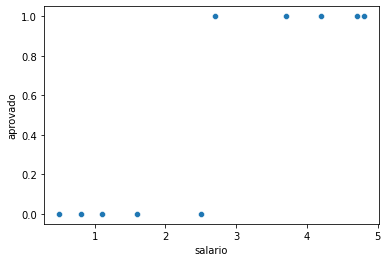

In [5]:
sns.scatterplot(x=credito['salario'],y=credito['aprovado'])

In [6]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression().fit(credito[['salario']],credito['aprovado'])

In [7]:
X=np.linspace(-1,6) # Return evenly spaced numbers over a specified interval

In [8]:
proba = lr.predict_proba(X.reshape(-1,1)).T[1] #Porcentagem de não ser 
proba

array([0.00750205, 0.00907302, 0.01096931, 0.01325664, 0.0160132 ,
       0.01933173, 0.02332167, 0.02811151, 0.033851  , 0.04071322,
       0.04889614, 0.05862323, 0.07014266, 0.08372433, 0.09965397,
       0.11822338, 0.13971603, 0.16438756, 0.19244112, 0.2239988 ,
       0.25907132, 0.29752979, 0.33908459, 0.38327656, 0.42948528,
       0.47695656, 0.52484783, 0.57228637, 0.61843196, 0.66253473,
       0.70397996, 0.74231488, 0.77725615, 0.80868062, 0.83660374,
       0.86115121, 0.88252867, 0.90099322, 0.91682896, 0.9303277 ,
       0.94177472, 0.95143919, 0.95956837, 0.9663848 , 0.97208546,
       0.97684254, 0.98080494, 0.98410039, 0.98683766, 0.98910889])

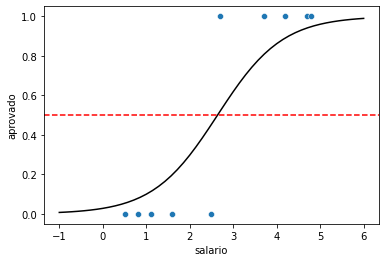

In [9]:
chart = sns.scatterplot(x=credito['salario'],y=credito['aprovado'])

sns.lineplot(x=X, y=proba, color='black')

chart.axhline(0.5,ls='--',color='red')


No gráfico acima podemos ver a curva de probabilidade em preto, tendo nosso
‘Treshold’, ou fronteira de decisão, em 0.5, representado pela linha vermelha.
Todos que estiverem com a probabilidade 0.5 ou maior serão classificados como
1 (terão o crédito aprovado) e todos que estiverem abaixo serão classificado
como 0 (será reprovado).
Esse ‘Threshold’ também é um parâmetro que podemos alterar de acordo com
nossas decisões de negócio.

# Aplicando em um dataset maior

Agora vamos aplicar esse novo conhecimento em um dataset um pouco maior e
não inventado. Usaremos o dataset: Breast Cancer Wisconsin Diagnostic),
disponibilizado pelo Scikit-learn. A variável alvo classifica como 1 o tumor
maligno e 0 o Benigno. As demais variáveis são calculadas a partir de uma
imagem digitalizada de uma massa mamária. Eles descrevem características dos
núcleos celulares presentes na imagem.

In [10]:
from sklearn.datasets import load_breast_cancer

ds = load_breast_cancer()

variaveis = pd.DataFrame(ds.data,columns=ds.feature_names)

target = pd.Series(ds.target,name='diagnostico')

df = pd.concat([variaveis,target],axis=1)

In [11]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostico
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# EDA Básico

Faremos um rápido EDA somente com algumas variáveis para que a gente possa
focar nos algoritmos de classificação. Olhando o diagnóstico contra as outras
variáveis, tentamos descobrir quais nos trazem mais informação para diferenciar
o "tumor maligno do benigno", isto é, em quais variáveis eu enxergo uma
distribuição em que elas sejam mais distantes.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnostico                0
dtype: int64

In [14]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnostico'],
      dtype='object')

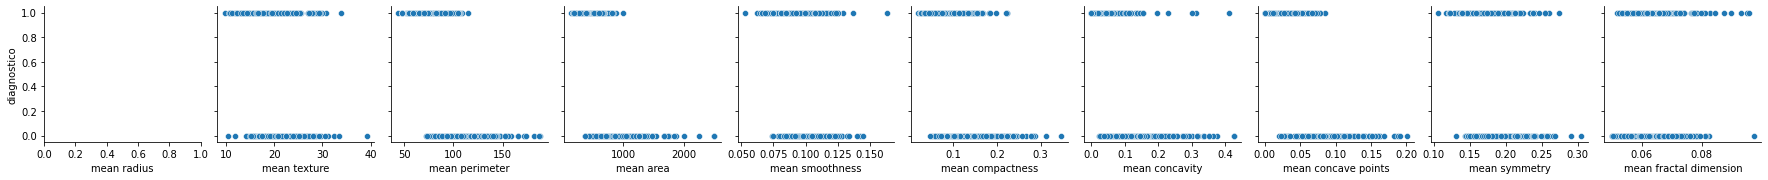

In [15]:
sns.pairplot(df,x_vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'],y_vars=['diagnostico'])

Procurar por multicolinearidade, ou seja, um problema comum em regressões, no qual as 
variáveis independentes possuem relações lineares exatas ou aproximadamente exatas, 
nas variáveis independentes. Caso encontremos variáveis que tenham uma alta correlação, devemos optar por incluir apenas uma delas.

<AxesSubplot:>

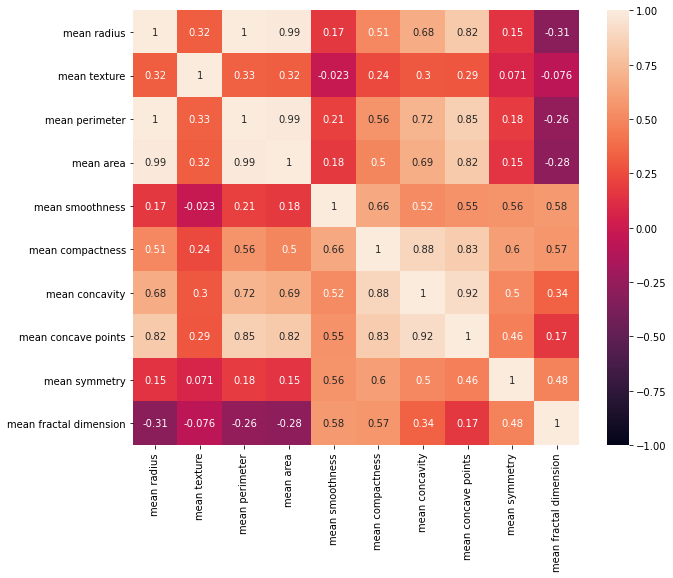

In [16]:
plt.subplots(figsize=(10, 8))

sns.heatmap(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']].corr(),vmax=1,vmin=-1,annot=True)

Podemos ver que "mean radius", "mean perimeter" e "mean area" tem uma
correlação quase próxima a 1. Então devemos optar pela inclusão de apenas uma
delas na regressão.

<AxesSubplot:>

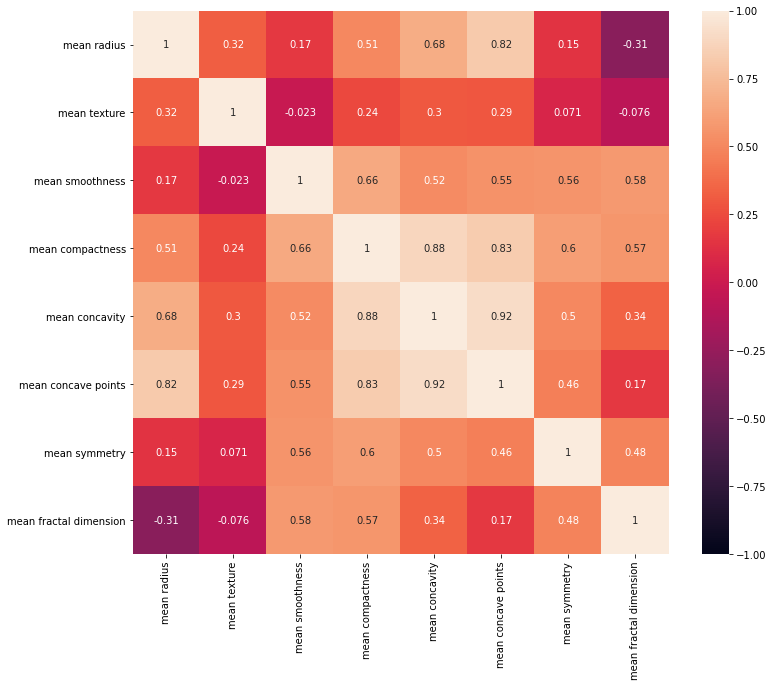

In [17]:
plt.subplots(figsize=(12, 10))

sns.heatmap(df[['mean radius', 'mean texture','mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']].corr(),vmax=1,vmin=-1,annot=True)

Decidi retir o "MEAN CONCAVITY, mean concave pointS "  OBSERVANDO : mean concavity x mean concave point x mean compactness  

<AxesSubplot:>

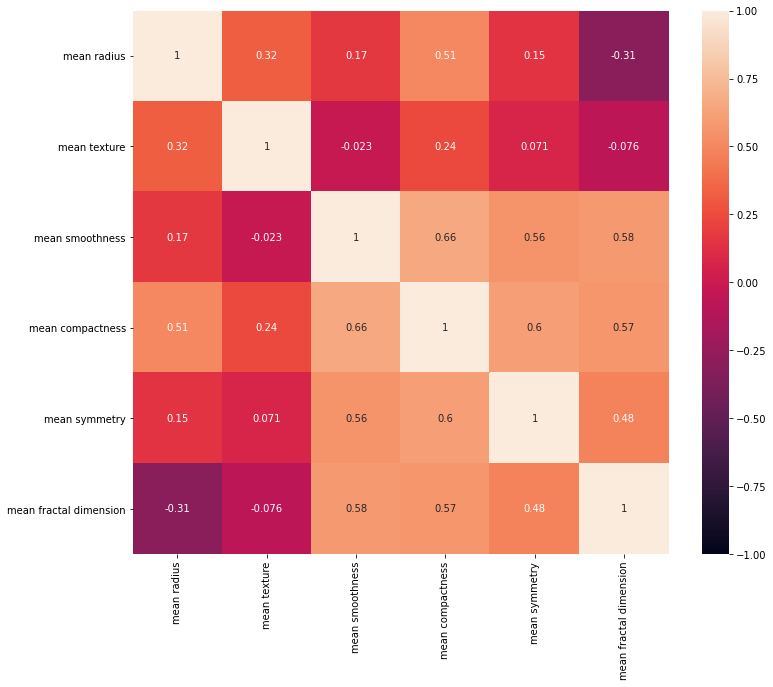

In [18]:
plt.subplots(figsize=(12, 10))

sns.heatmap(df[['mean radius', 'mean texture','mean smoothness', 'mean compactness', 'mean symmetry', 'mean fractal dimension']].corr(),vmax=1,vmin=-1,annot=True)


# Train/test split

Abaixo, vamos dividir o dataset em Treino e Teste e em seguida treinar o modelo.

Esse comando vai dividir o dataset em treino e teste, separando as variáveis
independentes da nossa variável alvo.
'test_size': indica o percentual do dataset que será separado para teste, no caso
25%.
'random_state': indica como a divisão é feita de maneira aleatória —um jeito de
garantir que se você quiser ter o mesmo resultado que o meu, basta passar o
mesmo número que coloquei neste hiperparâmetro.
Pronto! Agora para toda a regressão logística e para fazer a previsão nos dados
de teste basta rodar o seguinte código:


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_teste = train_test_split(variaveis[['mean radius','mean texture','mean smoothness', 
                            'mean compactness', 'mean symmetry', 'mean fractal dimension']],
                                                     target,test_size=0.25,random_state=101)

In [21]:
lr_2 = LogisticRegression().fit(X_train,y_train)

In [22]:
y_pred_lr = lr_2.predict(X_test)

In [23]:
y_pred_lr

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

# Métricas

Avaliando o modelo de classificação
Com o nosso modelo treinado, precisamos entender qual a performance quando
ele está olhando para novos dados. Por isso fizemos a divisão em treino e teste.

# Matriz de confusão

Na tabela abaixo temos a Matriz de confusão. Essa matriz traz a frequência para
cada classificação cruzando a previsão que o modelo gerou com o diagnóstico

In [24]:
from sklearn.metrics import (plot_confusion_matrix,
accuracy_score, recall_score,precision_score, plot_roc_curve)

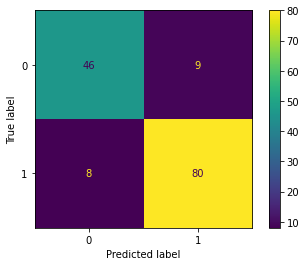

In [25]:
plot_confusion_matrix(lr_2,X_test,y_teste)

Nessa tabela podemos ver que 8 casos de diagnóstico Maligno o modelo
previu como Benigno e 9 nove casos onde o diagnóstico real era Benigno e o
modelo classificou incorretamente como Maligno.

Com essa tabela em mão podemos calcular algumas métricas de avaliação como:
    
- Acurácia: % de predições corretas
- Precisão: % de predições corretas dentro da classe positiva
- Recall: % de predições corretas dentro da classe esperada como positiva
    
Com o comando abaixo podemos ver todas essas métricas:


In [26]:
print(f'Acurácia:{accuracy_score(y_teste, y_pred_lr)},\n\
Precisão:{precision_score(y_teste,y_pred_lr)}\n\
Recall:{recall_score(y_teste,y_pred_lr)}')

Acurácia:0.8811188811188811,
Precisão:0.898876404494382
Recall:0.9090909090909091


# Curva ROC e AUC

A Curva ROC (Receiver Operating Characteristic ou Característica de Operação
do Receptor) é uma representação gráfica que ilustra o desempenho de um
sistema classificador binário à medida que o seu limiar de discriminação varia. É
criada quando colocamos no gráfico a taxa de verdadeiro-positivo contra a taxa
de falso-positivo para diferentes ''thresholds".

Lembra lá no começo desse artigo, aquela linha vermelha que decidimos colocar
em 0.5? Variando esse valor de 0 a 1 e vendo como a taxa de verdadeiro-positivo
e falso-positivo mudam, temos a curva ROC. E, para transformar essa curva em
um número temos a AUC (Area under the curve ou a Área sob a curva, em
tradução livre, que representa grau ou medida de separabilidade), dessa maneira
fica mais fácil de comparar essa métrica entre diversos modelos

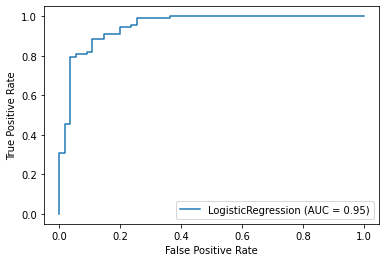

In [27]:
plot_roc_curve(lr_2,X_test,y_teste)

# Outros algoritmos de classificação

Regressão logística & Algoritmos de classificação 11
A seguir veremos de maneira breve outros algoritmos de classificação. Como
passaremos rapidamente por eles, deixarei o link da documentação de cada um.
Assim você pode explorar cada um com mais atenção e brincar com os
hiperparâmetros para ver como a performance se altera.

A estrutura será a seguinte:

- Carregar o modelo
- Treinar o modelo
- Prever com a partição de teste do dataset
- Calcular as métricas

## SVM

Support Vector Machine (ou Máquina
de vetores de suporte), é um
algoritmo que encontra uma linha de
separação, ou um hiperplano quando
temos mais de duas dimensões, que
separa os dados em classes. 

Essa
linha tenta maximizar a distância entre
os pontos de cada classe.
Veja a imagem ilustrativa:

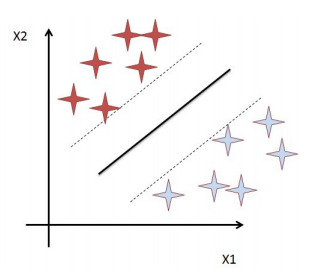


In [28]:
from sklearn.svm import SVC

In [29]:
svm=SVC()

svm.fit(X_train,y_train)

y_pred_svm=svm.predict(X_test)

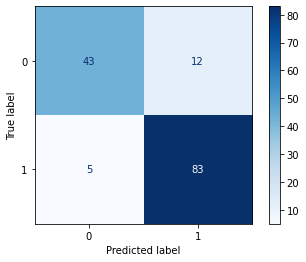

In [30]:
plot_confusion_matrix(svm, X_test,y_teste,cmap='Blues')

In [31]:
print(f'Acurácia:{accuracy_score(y_teste, y_pred_svm)},\n\
Precisão:{precision_score(y_teste,y_pred_svm)}\n\
Recall:{recall_score(y_teste,y_pred_svm)}')


Acurácia:0.8811188811188811,
Precisão:0.8736842105263158
Recall:0.9431818181818182


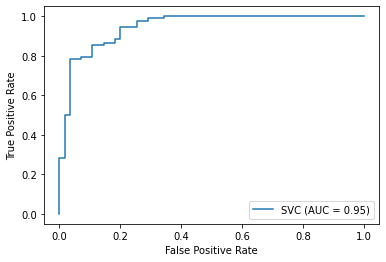

In [32]:
plot_roc_curve(svm,X_test,y_teste)

## KNN

Cada observação será classificada de acordo com os seus vizinhos. Se k for
igual a 3, a nova observação será comparada com os 3 vizinhos mais próximos e
a classe a que pertencer a maioria desses vizinhos será atribuída à nova
observação.


Na figura ao lado a nova observação
representada pelo círculo verde será
classificada como triângulo vermelho,
pois é a classe majoritária levando em
conta os três vizinhos mais próximos.
Porém, se k fosse igual à 5, seria
classificada como quadrado azul.



In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn=KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)

plot_confusion_matrix(knn, X_test,y_teste,cmap='Blues')

In [35]:
print(f'Acurácia:{accuracy_score(y_teste, y_pred_knn)},\n\
Precisão:{precision_score(y_teste,y_pred_knn)}\n\
Recall:{recall_score(y_teste,y_pred_knn)}')


Acurácia:0.8671328671328671,
Precisão:0.8876404494382022
Recall:0.8977272727272727


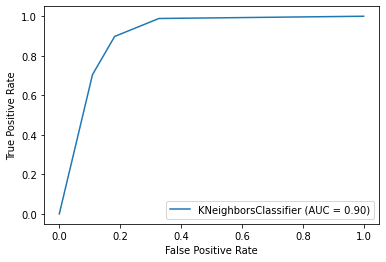

In [36]:
plot_roc_curve(knn,X_test,y_teste)

# Naive Bayes

É um classificador probabilístico com base na aplicação do teorema de Bayes
com a suposição “ingênua” de independência condicional entre cada variável.

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
nb= GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

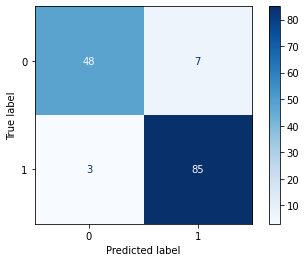

In [39]:
plot_confusion_matrix(nb, X_test,y_teste,cmap='Blues')

In [40]:
print(f'Acurácia:{accuracy_score(y_teste, y_pred_nb)},\n\
Precisão:{precision_score(y_teste,y_pred_nb)}\n\
Recall:{recall_score(y_teste,y_pred_nb)}')


Acurácia:0.9300699300699301,
Precisão:0.9239130434782609
Recall:0.9659090909090909


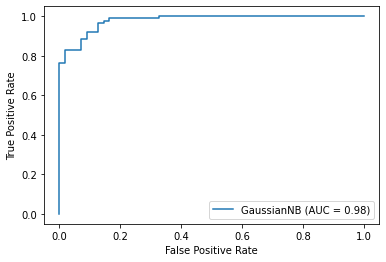

In [41]:
plot_roc_curve(nb,X_test,y_teste)

# Árvore de Decisão

Uma árvore de decisão é uma representação de uma tabela de decisão sob a
forma de uma árvore, porém pode haver outras aplicações. Tem a mesma
utilidade da tabela de decisão.

Esse modelo irá classificar novas observações através de simples regras de
decisão que terá aprendido com o dataset de treino. Uma característica bem
legal desse método é que podemos visualizar a regra de cada nó.


In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [43]:
dtree = DecisionTreeClassifier(max_depth=3)

dtree.fit(X_train,y_train)

y_pred_dtree = dtree.predict(X_test)

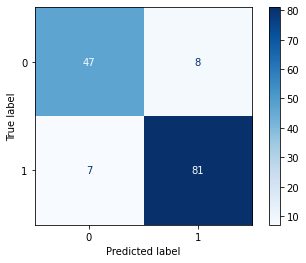

In [44]:
plot_confusion_matrix(dtree, X_test,y_teste,cmap='Blues')

In [45]:
print(f'Acurácia:{accuracy_score(y_teste, y_pred_dtree)},\n\
Precisão:{precision_score(y_teste,y_pred_dtree)}\n\
Recall:{recall_score(y_teste,y_pred_dtree)}')


Acurácia:0.8951048951048951,
Precisão:0.9101123595505618
Recall:0.9204545454545454


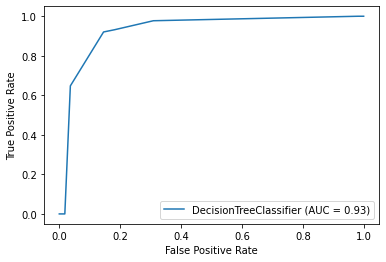

In [46]:
plot_roc_curve(dtree,X_test,y_teste)

- ## Visualizando a árvore

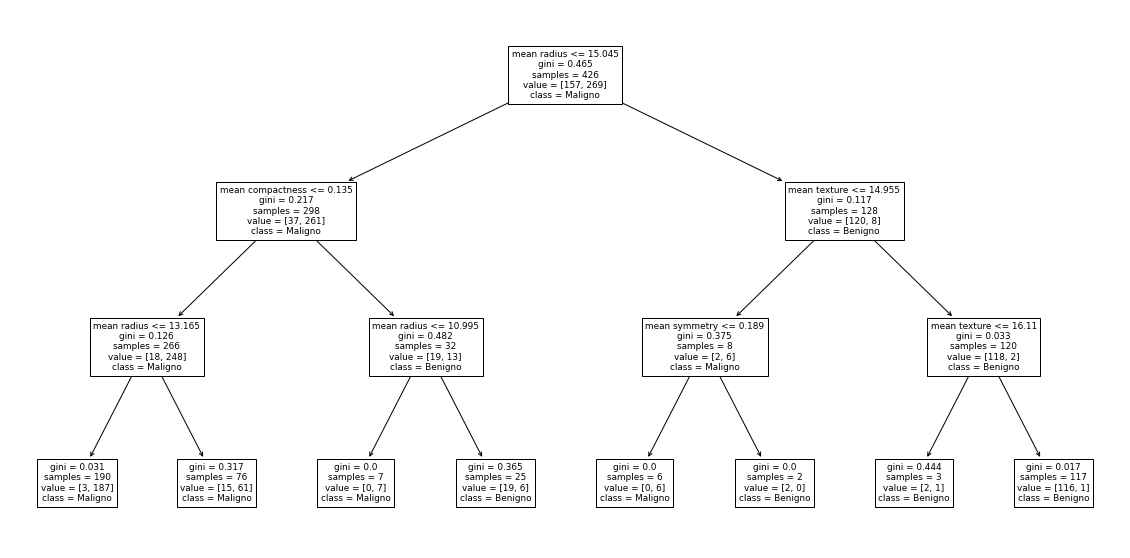

In [47]:
plt.figure(figsize=(20,10))

plot_tree(dtree,feature_names=['mean radius','mean texture','mean smoothness', 
                            'mean compactness', 'mean symmetry', 'mean fractal dimension'], class_names=['Benigno','Maligno']);

## Comparando todos os modelos

Agora que vimos os principais modelos de classificação segue abaixo um
exemplo de como podemos fazer a comparação de todos eles com as métricas
que aprendemos

In [48]:
classifiers = [lr_2,svm,knn,nb,dtree]

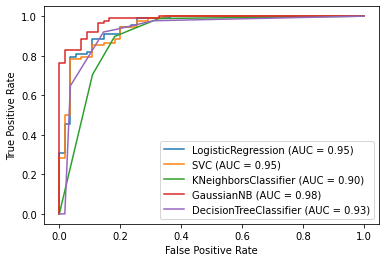

In [49]:
ax=plt.gca()

for i in classifiers:
    
    plot_roc_curve(i, X_test, y_teste,ax=ax)

In [50]:
for i in classifiers:
    
    y_pred = i.predict(X_test)
    
    print(f'****{type(i).__name__}***') #f'' concateando o invés de '***',objeto,'***'
    
    print(f'Acurácia:{round(accuracy_score(y_teste, y_pred),2)}\n\
Precisão:{round(precision_score(y_teste,y_pred),2)}\n\
Recall:{round(recall_score(y_teste,y_pred),2)}')
    print('______________________________')


****LogisticRegression***
Acurácia:0.88
Precisão:0.9
Recall:0.91
______________________________
****SVC***
Acurácia:0.88
Precisão:0.87
Recall:0.94
______________________________
****KNeighborsClassifier***
Acurácia:0.87
Precisão:0.89
Recall:0.9
______________________________
****GaussianNB***
Acurácia:0.93
Precisão:0.92
Recall:0.97
______________________________
****DecisionTreeClassifier***
Acurácia:0.9
Precisão:0.91
Recall:0.92
______________________________


In [63]:
lr_2.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}